# IDM_COURSE_PROJECT_1(2).ipynb

# Step 1: Data Loading and Inspection

In [2]:
import pandas as pd
# Load the CSV File
data = pd.read_csv("/content/drive/MyDrive/Machine-Learning/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")
data.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD



# Checking Data Types

In [ ]:
data.shape, data.dtypes

((53392, 33),
 YearStart                       int64
 YearEnd                         int64
 LocationAbbr                   object
 LocationDesc                   object
 Datasource                     object
 Class                          object
 Topic                          object
 Question                       object
 Data_Value_Unit               float64
 Data_Value_Type                object
 Data_Value                    float64
 Data_Value_Alt                float64
 Data_Value_Footnote_Symbol     object
 Data_Value_Footnote            object
 Low_Confidence_Limit          float64
 High_Confidence_Limit         float64
 Sample_Size                   float64
 Total                          object
 Age(years)                     object
 Education                      object
 Gender                         object
 Income                         object
 Race/Ethnicity                 object
 GeoLocation                    object
 ClassID                        object
 TopicID   

In [ ]:
# Summary Statistics
data.describe()

,YearStart,YearEnd,Data_Value_Unit,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
count,53392.000000,53392.000000,0.0,48346.000000,48346.000000,48346.000000,48346.000000,48346.00000,53392.000000
mean,2013.281465,2013.281465,NaN,31.156681,31.156681,26.892227,35.989997,3889.19286,30.282215
std,1.693300,1.693300,NaN,10.247033,10.247033,10.038584,11.205813,19829.42129,16.821318
min,2011.000000,2011.000000,NaN,0.900000,0.900000,0.300000,3.000000,50.00000,1.000000
25%,2012.000000,2012.000000,NaN,24.100000,24.100000,20.000000,28.200000,566.00000,17.000000
50%,2013.000000,2013.000000,NaN,30.700000,30.700000,26.450000,35.600000,1209.00000,30.000000
75%,2015.000000,2015.000000,NaN,37.000000,37.000000,32.900000,42.200000,2519.00000,44.000000
max,2016.000000,2016.000000,NaN,77.600000,77.600000,69.500000,87.700000,476876.00000,78.000000


# Step 2: Handling Missing Data

In [ ]:
# Identifying Missing Values
missing_values = data.isnull().sum()
total_rows = len(data)
percentage_missing = (missing_values / total_rows) * 100
percentage_missing

YearStart                       0.000000
YearEnd                         0.000000
LocationAbbr                    0.000000
LocationDesc                    0.000000
Datasource                      0.000000
Class                           0.000000
Topic                           0.000000
Question                        0.000000
Data_Value_Unit               100.000000
Data_Value_Type                 0.000000
Data_Value                      9.450854
Data_Value_Alt                  9.450854
Data_Value_Footnote_Symbol     90.549146
Data_Value_Footnote            90.549146
Low_Confidence_Limit            9.450854
High_Confidence_Limit           9.450854
Sample_Size                     9.450854
Total                          96.428304
Age(years)                     78.577315
Education                      85.713215
Gender                         92.856608
Income                         74.998127
Race/Ethnicity                 71.426431
GeoLocation                     1.887923
ClassID         

In [ ]:
# Filter the columns where missing values exceed 70%
columns_missing_more_than_70 = percentage_missing[percentage_missing > 70]

# Print the column names
print("Column names with missing values more than 70%:")
print(columns_missing_more_than_70.index.tolist())
data.drop(columns=columns_missing_more_than_70.index.tolist(), inplace=True)

Column names with missing values more than 70%:
['Data_Value_Unit', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'Total', 'Age(years)', 'Education', 'Gender', 'Income', 'Race/Ethnicity']


In [ ]:
# Assuming 'data' is your DataFrame
unique_values_count = data.nunique()

# Print or access unique values count for specific columns
print(unique_values_count)

YearStart                       6
YearEnd                         6
LocationAbbr                   55
LocationDesc                   55
Datasource                      1
Class                           3
Topic                           3
Question                        9
Data_Value_Type                 1
Data_Value                    669
Data_Value_Alt                669
Low_Confidence_Limit          654
High_Confidence_Limit         723
Sample_Size                  8123
GeoLocation                    54
ClassID                         3
TopicID                         3
QuestionID                      9
DataValueTypeID                 1
LocationID                     55
StratificationCategory1         6
Stratification1                28
StratificationCategoryId1       6
StratificationID1              28
dtype: int64


In [ ]:
columns_with_unique_count_1 = [col for col in data.columns if data[col].nunique() == 1]
# Create a new DataFrame with only columns having unique value count equal to 1
data_with_unique_count_1 = data[columns_with_unique_count_1]

# Print columns with unique value count equal to 1
print("Columns with unique value count equal to 1:")
print(columns_with_unique_count_1)
# Dropping the columns with only 1 unique value
data.drop(columns=columns_with_unique_count_1, inplace=True)

Columns with unique value count equal to 1:
['Datasource', 'Data_Value_Type', 'DataValueTypeID']


In [ ]:
# Step 1: Identify rows with missing values
rows_with_missing_values = data[data.isnull().any(axis=1)]

# Step 2: Calculate the total number of rows with missing values
total_rows_with_missing = len(rows_with_missing_values)

# Step 3: Calculate the total number of rows in the DataFrame
total_rows = len(data)

# Step 4: Calculate the percentage
percentage_missing_rows = (total_rows_with_missing / total_rows) * 100

# Print the percentage
print(f"Percentage of rows with missing values: {percentage_missing_rows:.2f}%")

# Assuming 'data' is your DataFrame and 'data value' is the column name
data.dropna(subset=['Data_Value'], inplace=True)


Percentage of rows with missing values: 11.34%


In [ ]:
def check_and_drop_duplicate_columns(data, group_col, unique_col):
    # Check when 'unique_col' is the grouping column
    unique_count1 = data.groupby(unique_col)[group_col].nunique()
    are_unique1 = (unique_count1 == 1).all()

    # Check when 'group_col' is the grouping column
    unique_count2 = data.groupby(group_col)[unique_col].nunique()
    are_unique2 = (unique_count2 == 1).all()

    if are_unique1 and are_unique2:
        print(f"For each unique {group_col}, there is only one unique corresponding {unique_col}. and vica versa")
        data.drop(columns=[unique_col], inplace=True)
        print(f"Dropped the {unique_col} column.")
    else:
        if not are_unique1:
            print(f"There are {unique_col} values with multiple corresponding {group_col}.")
        if not are_unique2:
            print(f"There are {group_col} values with multiple corresponding {unique_col}.")

In [ ]:
# Group by 'LocationDesc' and count unique 'Coordinates' values in each group
unique_GeoLocation_count = data.groupby('LocationDesc')['GeoLocation'].nunique()
percentage_unique_GeoLocation = (unique_GeoLocation_count == 1).mean() * 100
print(f"{percentage_unique_GeoLocation:.2f}% of LocationDesc values have only one unique corresponding Coordinates.")
data.drop(columns=['GeoLocation'], inplace=True)

98.18% of LocationDesc values have only one unique corresponding Coordinates.


In [ ]:
check_and_drop_duplicate_columns(data, 'LocationDesc', 'LocationAbbr')
check_and_drop_duplicate_columns(data, 'YearStart', 'YearEnd')
check_and_drop_duplicate_columns(data, 'Data_Value', 'Data_Value_Alt')
check_and_drop_duplicate_columns(data, 'LocationDesc', 'LocationID')
check_and_drop_duplicate_columns(data, 'Class', 'Topic')
check_and_drop_duplicate_columns(data, 'Question', 'QuestionID')
check_and_drop_duplicate_columns(data, 'ClassID', 'TopicID')
check_and_drop_duplicate_columns(data, 'Class', 'ClassID')
check_and_drop_duplicate_columns(data, 'StratificationCategory1', 'StratificationCategoryId1')
check_and_drop_duplicate_columns(data, 'Stratification1', 'StratificationID1')

For each unique LocationDesc, there is only one unique corresponding LocationAbbr. and vica versa
Dropped the LocationAbbr column.
For each unique YearStart, there is only one unique corresponding YearEnd. and vica versa
Dropped the YearEnd column.
For each unique Data_Value, there is only one unique corresponding Data_Value_Alt. and vica versa
Dropped the Data_Value_Alt column.
For each unique LocationDesc, there is only one unique corresponding LocationID. and vica versa
Dropped the LocationID column.
For each unique Class, there is only one unique corresponding Topic. and vica versa
Dropped the Topic column.
For each unique Question, there is only one unique corresponding QuestionID. and vica versa
Dropped the QuestionID column.
For each unique ClassID, there is only one unique corresponding TopicID. and vica versa
Dropped the TopicID column.
For each unique Class, there is only one unique corresponding ClassID. and vica versa
Dropped the ClassID column.
For each unique Stratificati

# Dealing with Missing Data


In [ ]:
# Create a new column 'Confidence_Interval_Width' by calculating the width of the confidence interval
data['Confidence_Interval_Width'] = (data['High_Confidence_Limit ']) - (data['Low_Confidence_Limit'])

# Drop the 'Low_Confidence_Limit' and 'High_Confidence_Limit' columns
data.drop(columns=['Low_Confidence_Limit', 'High_Confidence_Limit '], inplace=True)

<ipython-input-22-d5925f26ce5c>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


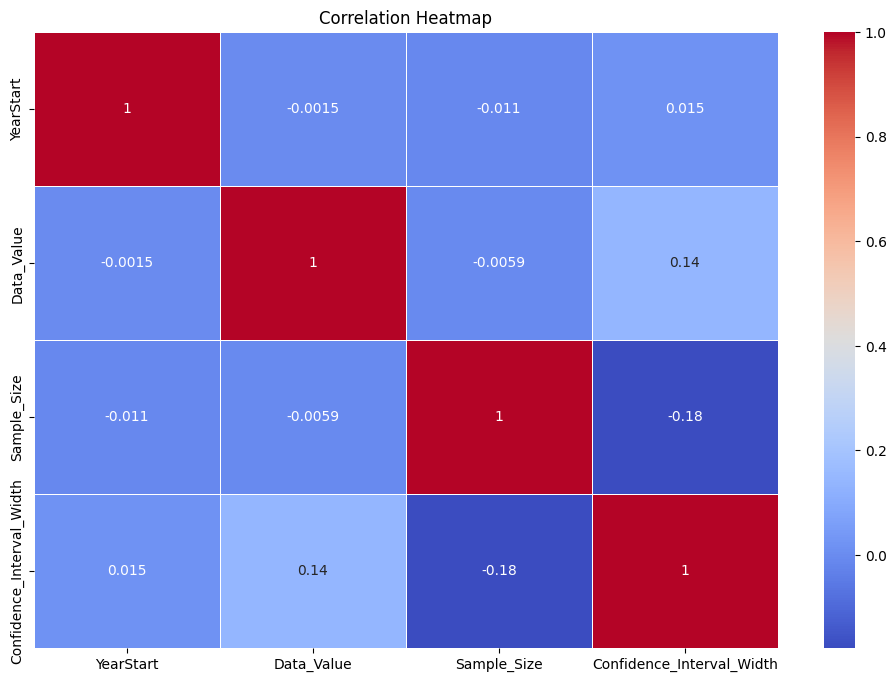

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
correlation_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


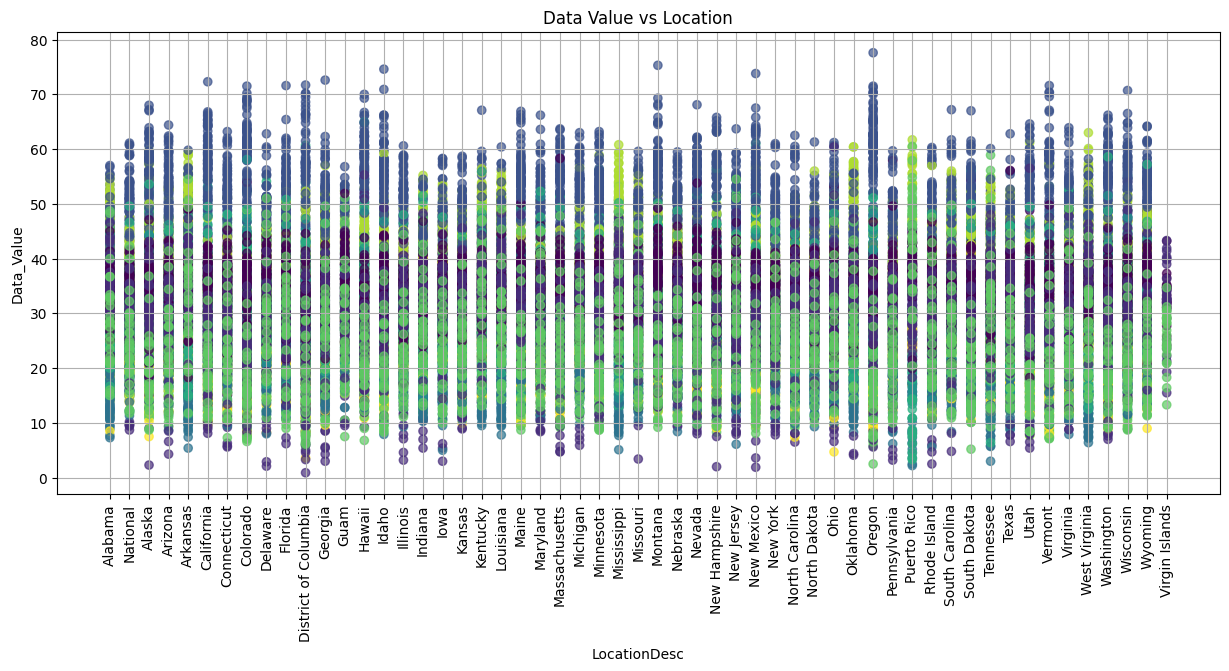

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
# Assuming 'data.csv' is the file containing the data
# data = pd.read_csv('data.csv')

# Extract and process required columns
x = data['LocationDesc']
y = data['Data_Value']
colors = data['Question'].astype('category').cat.codes  # Assign a unique code for each question for color mapping

# Create a scatter plot
fig, ax = plt.subplots(figsize=(15, 6))  # Adjust the figsize to your desired width and height
scatter = ax.scatter(x, y, c=colors, alpha=0.7, cmap='viridis')

# Customize the plot
ax.set_xlabel('LocationDesc')
ax.set_ylabel('Data_Value')
ax.set_title('Data Value vs Location')
ax.grid(True)

# Create a legend
legend_labels = {code: question for code, question in zip(colors.unique(), data['Question'].unique())}
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(code)), label=legend_labels[code]) for code in colors.unique()]
# ax.legend(handles=legend_elements, title='Question')

plt.xticks(rotation=90)

# Show the plot
plt.show()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame
label_encoder = LabelEncoder()
data['YearStart'] = label_encoder.fit_transform(data['YearStart'])


In [ ]:
# Assuming 'data' is your DataFrame and 'Class' is the attribute to be encoded
encoded_data = pd.get_dummies(data, columns=['Class'], prefix=['Class'])
data = encoded_data
# Print the encoded DataFrame
print(data.head())


   YearStart LocationDesc                                           Question  \
0          0      Alabama  Percent of adults aged 18 years and older who ...   
1          0      Alabama  Percent of adults aged 18 years and older who ...   
2          0      Alabama  Percent of adults aged 18 years and older who ...   
3          0      Alabama  Percent of adults aged 18 years and older who ...   
4          0      Alabama  Percent of adults aged 18 years and older who ...   

   Data_Value  Sample_Size StratificationCategory1        Stratification1  \
0    0.405476     0.015213                   Total                  Total   
1    0.409387     0.005308                  Gender                   Male   
2    0.402868     0.009800                  Gender                 Female   
3    0.426336     0.002313               Education  Less than high school   
4    0.415906     0.004933               Education   High school graduate   

   Confidence_Interval_Width  Class_Fruits and Vegetable

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming 'data' is your DataFrame

# Select the columns to scale to the range [0, 1]
columns_to_scale = ['Confidence_Interval_Width', 'Sample_Size', 'Data_Value']

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the selected columns
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Now, the selected columns are scaled to the range [0, 1]


In [ ]:
# Replace 'data' with your DataFrame and 'Attribute_Name' with the name of the attribute you want to extract unique values from
unique_values = data['Question'].unique().tolist()

# Print the list of unique values
print(unique_values)


['Percent of adults aged 18 years and older who have obesity', 'Percent of adults aged 18 years and older who have an overweight classification', 'Percent of adults who report consuming fruit less than one time daily', 'Percent of adults who report consuming vegetables less than one time daily', 'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week', 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)', 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week', 'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic act

In [ ]:
# Assuming 'data' is your DataFrame
unique_values_count = data.nunique()

# Print or access unique values count for specific columns
print(unique_values_count)

YearStart                       6
LocationDesc                   55
Class                           3
Question                        9
Data_Value                    669
Sample_Size                  8123
StratificationCategory1         6
Stratification1                28
Confidence_Interval_Width    1305
dtype: int64


In [ ]:
data.head()

,YearStart,LocationDesc,Question,Data_Value,Sample_Size,StratificationCategory1,Stratification1,Confidence_Interval_Width,Class_Fruits and Vegetables,Class_Obesity / Weight Status,Class_Physical Activity
0,0,Alabama,Percent of adults aged 18 years and older who ...,0.405476,0.015213,Total,Total,0.045872,0,1,0
1,0,Alabama,Percent of adults aged 18 years and older who ...,0.409387,0.005308,Gender,Male,0.078899,0,1,0
2,0,Alabama,Percent of adults aged 18 years and older who ...,0.402868,0.009800,Gender,Female,0.056881,0,1,0
3,0,Alabama,Percent of adults aged 18 years and older who ...,0.426336,0.002313,Education,Less than high school,0.132110,0,1,0
4,0,Alabama,Percent of adults aged 18 years and older who ...,0.415906,0.004933,Education,High school graduate,0.089908,0,1,0


In [ ]:
# Assuming 'data' is your modified DataFrame
# Save the modified DataFrame as "data.csv"
data.to_csv('data.csv', index=False)

# Use 'files.download()' to download the modified "data.csv" file
from google.colab import files
files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>